### Clustering

In [76]:
# Import Libraries and dependancies 
import pandas as pd
import numpy as np
import hvplot.pandas
from scipy.spatial.distance import cdist
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from prophet import Prophet

In [77]:
# Fetch data using API.
# Data listed below is for example only.
data = {
    'Ticker': ['ETF1', 'ETF2', 'ETF3', 'ETF4', 'ETF5'],
    'Annual_Return': [0.1, 0.11, 0.22, 0.33, 0.44],
    'Annual_Volatility': [0.23, 0.43, 0.35, 0.97, 0.2],
    'ETF_Segment': ['Tech', 'Finance', 'Healthcare', 'Energy', 'Market']
}


In [78]:
# Create a DataFrame from the example data 
API_df = pd.DataFrame(data)
API_df.head()

,Ticker,Annual_Return,Annual_Volatility,ETF_Segment
0,ETF1,0.10,0.23,Tech
1,ETF2,0.11,0.43,Finance
2,ETF3,0.22,0.35,Healthcare
3,ETF4,0.33,0.97,Energy
4,ETF5,0.44,0.20,Market


In [79]:
# prepare the data for clustering by extractim 'Annual_Ret' and 'Annual_Volaility' columns.
X = API_df[['Annual_Return', 'Annual_Volatility']].values

In [80]:
# Prepare a DataFrame for clustering by extracting 'Annual_Return' and 'Annual_Volatility' columns.
X = API_df[['Annual_Return', 'Annual_Volatility']].values

In [81]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# Apply PCA for dimensional reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [83]:
# Create an empty list to store the distorded values
distorions = []

In [84]:
# Define a range of k values to test (from 1-5)
# Loop through each k value, fit the model and calculate the distortion
K = range(1,6)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_pca)
    distorions.append(sum(np.min(cdist(X_pca, kmeans.cluster_centers_, 'euclidean'), axis=1))/X_pca.shape[0])

In [85]:
#plot the elbow curve to visualize the optimal k value
pd.Series(distorions, index=K).hvplot.line(xlabel='k', ylabel='Distortion', title='Elbow Method showing the optimal value for k')

:Curve   [index]   (0)

In [86]:
# Fit the KMeans model
optimal_k= 3
kmeans = KMeans(n_clusters=optimal_k).fit(X_pca)

In [87]:
# assign the cluster labels to each data point
API_df['Cluster'] = kmeans.labels_

In [88]:
# Visualize the clusters by plotting 'Annual_Return' on the z-axis and 'Annual_Volatility' on the y-axis
plot = API_df.hvplot.scatter(x='Annual_Return', y='Annual_Volatility', by='Cluster', hover_cols=['Ticker', 'ETF_Segment'], title='Clusters of ETFs')
plot

:NdOverlay   [Cluster]
   :Scatter   [Annual_Return]   (Annual_Volatility,Ticker,ETF_Segment)

In [89]:
# Load data (Replace this with the actual data)
# Below is example data for demonstration only
data = {'date': pd.date_range(start='2023-04-01', periods=365, freq='D'), 'close': np.random.rand(365)}
New_df = pd.DataFrame(data)
New_df

,date,close
0,2023-04-01,0.042564
1,2023-04-02,0.437327
2,2023-04-03,0.221310
3,2023-04-04,0.815314
4,2023-04-05,0.831345
...,...,...
360,2024-03-26,0.763762
361,2024-03-27,0.508753
362,2024-03-28,0.969176
363,2024-03-29,0.498502


In [90]:
# Rename clumns to fit Prophet requirements
New_df = New_df.rename(columns={'date': 'ds', 'close':'y'})

In [91]:
# Fit Prophet model
model = Prophet()
model.fit(New_df)

17:12:49 - cmdstanpy - INFO - Chain [1] start processing
17:12:50 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
# Create future dates DataFrame for Predictions 
future = model.make_future_dataframe(periods=365)

In [93]:
# Generate predictions 
forcast = model.predict(future)

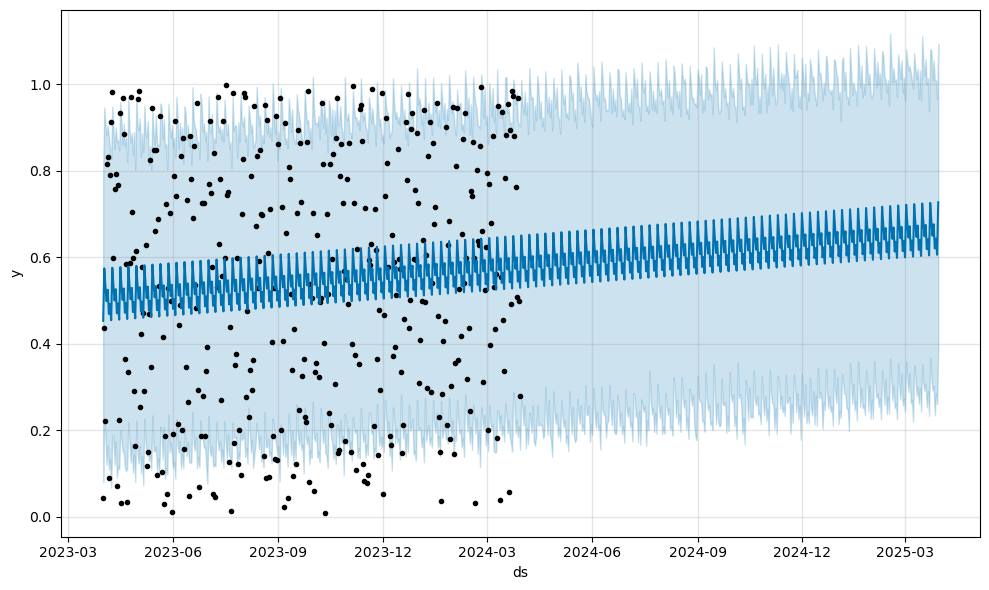

In [94]:
#Plot the forecast
fig = model.plot(forcast)